# 1- Gather 

In [1]:
import datetime as dt
import json
import matplotlib
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import re
import os
import requests
import tweepy
import matplotlib.pyplot as plt

In [2]:
twitter = pd.read_csv('twitter-archive-enhanced.csv')

# Import image predictions file

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [3]:
# Load the data

images = pd.read_csv('image_predictions.tsv', sep = '\t')

In [4]:
images.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [5]:
# Create dataframe

tweet = pd.DataFrame(columns=['tweet_id', 'retweet_count','favorite_count'])

with open('tweet_json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        
        tweet = tweet.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]], 
                                       columns = ['tweet_id', 'retweet_count', 'favorite_count']))
tweet = tweet.reset_index(drop = True)
tweet.sample(10)

,tweet_id,retweet_count,favorite_count
230,847971574464610304,482,0
203,852936405516943360,2243,0
142,864197398364647424,9616,31459
112,870726314365509632,3,121
16,888917238123831296,4709,29611
1930,674024893172875264,1360,1914
951,751830394383790080,2227,6428
1191,717537687239008257,2069,6281
1625,684594889858887680,4016,9843
631,793962221541933056,5711,18910


# 2-  Access

In [6]:
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
twitter.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1734,679736210798047232,NaN,NaN,2015-12-23 18:51:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup's name is Sabertooth (parents must be...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679736210...,9,10,None,None,None,None,None
828,768970937022709760,NaN,NaN,2016-08-26 00:38:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Kirby. His bowl weighs more than him. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768970937...,12,10,Kirby,None,None,None,None
745,780092040432480260,NaN,NaN,2016-09-25 17:10:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Hank. He's mischievous ...,7.533757e+17,4.196984e+09,2016-07-13 23:48:51 +0000,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,None,None,None
1566,687841446767013888,NaN,NaN,2016-01-15 03:39:15 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",13/10 I can't stop watching this (vid by @k8ly...,NaN,NaN,NaN,https://vine.co/v/iOWwUPH1hrw,13,10,None,None,None,None,None
426,821407182352777218,NaN,NaN,2017-01-17 17:21:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sundance. He's a doggo drummer. Even s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821407182...,14,10,Sundance,doggo,None,None,None
592,798933969379225600,NaN,NaN,2016-11-16 17:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Iroh. He's in a predicament. 12/10 som...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/798933969...,12,10,Iroh,None,None,None,None
1581,687124485711986689,NaN,NaN,2016-01-13 04:10:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Samson. He's a Firecracker Häagen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687124485...,11,10,Samson,None,None,None,None
1947,673700254269775872,NaN,NaN,2015-12-07 03:07:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Large blue dog here. Cool shades. Flipping us ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673700254...,3,10,None,None,None,None,None
1880,675006312288268288,NaN,NaN,2015-12-10 17:37:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mollie. This pic was taken after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675006312...,10,10,Mollie,None,None,pupper,None
136,866334964761202691,NaN,NaN,2017-05-21 16:48:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None


In [9]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [10]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
images.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1799,831670449226514432,https://pbs.twimg.com/media/C4qv3JUW8AADirb.jpg,1,Pembroke,0.624802,True,Cardigan,0.362861,True,Appenzeller,0.003926,True
1037,711998809858043904,https://pbs.twimg.com/tweet_video_thumb/CeGGkW...,1,comic_book,0.105171,False,kuvasz,0.059895,True,book_jacket,0.046638,False
1004,708845821941387268,https://pbs.twimg.com/media/CdZTgynWwAATZcx.jpg,1,schipperke,0.745640,True,kelpie,0.167853,True,Boston_bull,0.014763,True
953,705102439679201280,https://pbs.twimg.com/media/CckG63qUsAALbIr.jpg,1,collie,0.457672,True,chow,0.279101,True,Pomeranian,0.076922,True
1914,854120357044912130,https://pbs.twimg.com/media/C9px7jyVwAAnmwN.jpg,4,black-and-tan_coonhound,0.854861,True,Doberman,0.050792,True,bluetick,0.021762,True
978,707059547140169728,https://pbs.twimg.com/media/Cc_64zVWEAAeXs7.jpg,1,Samoyed,0.897312,True,Great_Pyrenees,0.039180,True,kuvasz,0.019516,True
41,666701168228331520,https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg,1,Labrador_retriever,0.887707,True,Chihuahua,0.029307,True,French_bulldog,0.020756,True
513,676219687039057920,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg,1,bubble,0.997556,False,leafhopper,0.000159,False,whippet,0.000132,True
1963,867051520902168576,https://pbs.twimg.com/media/DAhiwb0XcAA8x5Q.jpg,1,Samoyed,0.471403,True,Pekinese,0.302219,True,Pomeranian,0.156606,True
1993,874012996292530176,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,2,Cardigan,0.806674,True,Pembroke,0.116622,True,kelpie,0.049182,True


In [12]:
tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2354,2354,2354
unique,2354,1724,2007
top,718971898235854848,3652,0
freq,1,5,179


In [13]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [14]:
tweet.sample(15)

,tweet_id,retweet_count,favorite_count
1531,689999384604450816,424,1561
2240,667911425562669056,329,523
602,798628517273620480,2272,0
1359,703079050210877440,3494,8064
762,778027034220126208,1885,7320
53,881666595344535552,11099,51522
544,805826884734976000,2132,7335
1827,676237365392908289,331,1335
1520,690649993829576704,325,1435
2170,669327207240699904,127,610


## Issue related to data quality:

**Data type issue:**
- twitter: tweet_id,in_,in_reply_to_user_id, reply_to_status_id, retweeted_status_id, retweeted_status_user_id and in_reply_to_user_id shoud be 
- twitter: timestamp should be --> datetime 
- images: tweet_id shoud be --> object
- tweet: retweet_count and favorite_count should be --> integer

**Null issue:**
- general: the naming of some columns are vague (not discriptive)
- twitter: names,floofer, puppo, pupper and doggo have none as a value for some records, need to be updated with NaN

**Other issue:**
- images: p1, p2 and p3 some enries with capital letter and the other with small letter (in inconsisty of the data)
- images: a lot of data are missing (have just 2075 records)
- tweet: some  data are missing (have just 2347  records)

----

**Tidiness:**
- twitter: doggo, puppo, pupper and floofer  can be merged into one column
- twitter, images and tweet: all the three tables should be merged (all of them describe same tweet)

# 2- Clean

**Data type issue:**
- twitter: tweet_id,in_,in_reply_to_user_id, reply_to_status_id, retweeted_status_id, retweeted_status_user_id and in_reply_to_user_id shoud be --> object
- twitter: timestamp should be --> datetime 

In [15]:
c_twitter= twitter.copy()
c_images= images.copy()
c_tweet= tweet.copy()

In [16]:
c_twitter= pd.read_csv('twitter-archive-enhanced.csv',
                dtype={'tweet_id': 'object',
                      'in_reply_to_status_id': 'object',
                      'in_reply_to_user_id': 'object',
                      'retweeted_status_id': 'object',
                      'retweeted_status_user_id':'object'},
                parse_dates = ['timestamp'])

In [17]:
# To validate

c_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1), 

- images: tweet_id shoud be --> object

In [18]:
c_images.tweet_id = c_images.tweet_id.astype(str)

In [19]:
# To validate

c_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


- tweet: retweet_count and favorite_count should be --> integer

In [20]:
c_tweet.retweet_count = c_tweet.retweet_count.astype('int64')
c_tweet.favorite_count = c_tweet.favorite_count.astype('int64')

In [21]:
c_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


**Null issue:**
- general: the naming of some columns are vague (not discriptive)
- twitter: names,floofer, puppo, pupper and doggo have **none** as a value for some records, need to be updated with **NaN**

In [22]:
c_twitter.name.replace("None", np.nan, inplace = True)
c_twitter.doggo.replace("None", np.nan, inplace = True)
c_twitter.floofer.replace("None", np.nan, inplace = True)
c_twitter.pupper.replace("None", np.nan, inplace = True)
c_twitter.puppo.replace("None", np.nan, inplace = True)

In [23]:
c_twitter.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1698,681193455364796417,NaN,NaN,2015-12-27 19:22:30,"<a href=""http://twitter.com/download/iphone"" r...",This is Aspen. He's astronomically fluffy. I w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681193455...,11,10,Aspen,NaN,NaN,NaN,NaN
671,789960241177853952,NaN,NaN,2016-10-22 22:42:52,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Buddy. His father was a...,7.624645393884856e+17,4196983835.0,2016-08-08 01:44:46 +0000,https://twitter.com/dog_rates/status/762464539...,12,10,Buddy,NaN,NaN,NaN,NaN
934,753420520834629632,NaN,NaN,2016-07-14 02:47:04,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing an isolated squad of bo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753420520...,11,10,NaN,NaN,NaN,NaN,NaN
1926,674053186244734976,NaN,NaN,2015-12-08 02:29:37,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. Yes he is aware of the spoon'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674053186...,10,10,Stanley,NaN,NaN,NaN,NaN
1803,676948236477857792,NaN,NaN,2015-12-16 02:13:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Karl. Karl thinks he's slick. 6/10 sne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676948236...,6,10,Karl,NaN,NaN,NaN,NaN
1054,742423170473463808,NaN,NaN,2016-06-13 18:27:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Bell. She likes holding hands. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742423170...,12,10,Bell,NaN,NaN,NaN,NaN
750,779123168116150273,NaN,NaN,2016-09-23 01:00:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Reggie. He hugs everyone he meets. 12/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/779123168...,12,10,Reggie,NaN,NaN,NaN,NaN
870,761672994376806400,NaN,NaN,2016-08-05 21:19:27,"<a href=""http://twitter.com/download/iphone"" r...",Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761672994...,10,10,NaN,NaN,NaN,NaN,NaN
112,870804317367881728,NaN,NaN,2017-06-03 00:48:22,"<a href=""http://twitter.com/download/iphone"" r...",Real funny guys. Sending in a pic without a do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870804317...,11,10,NaN,NaN,NaN,NaN,NaN
488,813944609378369540,NaN,NaN,2016-12-28 03:08:11,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bruce. He never backs d...,7.902771173469757e+17,4196983835.0,2016-10-23 19:42:02 +0000,https://twitter.com/dog_rates/status/790277117...,11,10,Bruce,NaN,NaN,NaN,NaN


**Other issue:**
- images: p1, p2 and p3 some enries with capital letter and the other with small letter (in inconsisty of the data)
- images: a lot of data are missing (have just 2075 records)
- tweet: some  data are missing (have just 2347  records)

In [36]:
c_images['p1'] = c_images['p1'].str.lower()
c_images['p2'] = c_images['p2'].str.lower()
c_images['p3'] = c_images['p3'].str.lower()

In [37]:
# To validate

c_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [38]:
c_twitter1= c_twitter
c_images1= c_images

c_merged= pd.merge(c_twitter1, c_images1, how='left', on=['tweet_id'])

In [39]:
# To validate

t_id= c_images.tweet_id

for tweet_id in t_id:
    if tweet_id not in c_twitter.tweet_id.values:
        if tweet_id in c_merged.tweet_id.values:
            print('Number of ID# in merged, not'.format(tweet_id))

In [40]:
c_merged1= c_merged
c_tweet1= c_tweet

#c_tweet1.rename(columns={'id':tweet_id}, inplace=True)
c_merged= pd.merge(c_merged1, c_tweet1, how='left', on=['tweet_id'])

In [41]:

t_id= c_tweet.tweet_id

for tweet_id in t_id:
    if tweet_id not in c_twitter.tweet_id.values:
        if tweet_id in c_merged.tweet_id.values:
            print('Number of ID# in merged, not'.format(tweet_id))

**Tidiness:**
- twitter: doggo, puppo, pupper and floofer  can be merged into one column
- twitter, images and tweet: all the three tables should be merged (all of them describe same tweet)

In [42]:
c_merged['stage']= 'None'

def retrieve_stages(row):
    stage= []
    
    if row['doggo']== 'doggo':
        stage.append('doggo')
    if row['puppo']== 'puppo':
        stage.append('puppo')
    if row['pupper']== 'pupper':
        stage.append('pupper')
    if row['floofer']== 'floofer':
        stage.append('floofer')
        
    if len(stage) < 1:
        row['stage']= 'NaN'
    else:
        row['stage']= ','.join(stage)
        
    return row

c_merged= c_merged.apply(retrieve_stages, axis=1) 

c_merged= c_merged.drop(['doggo', 'puppo', 'pupper', 'floofer'], axis=1)

In [46]:
# To validate

c_merged.stage.value_counts()
#c_merged.info()
#c_images.info()
#c_tweet.info()

NaN              1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: stage, dtype: int64

In [47]:
c_merged[c_merged.stage == 'doggo,pupper']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,True,flat-coated_retriever,0.214145,True,irish_water_spaniel,0.029769,True,3084.0,11901.0,"doggo,pupper"
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,...,True,labrador_retriever,0.257447,True,great_pyrenees,0.126482,True,2525.0,9701.0,"doggo,pupper"
565,802265048156610565,7.33109485275861e+17,4196983835.0,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,...,True,beagle,0.016895,True,rhodesian_ridgeback,0.012061,True,1573.0,7039.0,"doggo,pupper"
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,...,True,english_setter,0.094602,True,bluetick,0.021953,True,2429.0,8992.0,"doggo,pupper"
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,...,False,sea_urchin,0.006106,False,echidna,0.005442,False,2561.0,8735.0,"doggo,pupper"
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2961.0,7973.0,"doggo,pupper"
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.33109485275861e+17,4196983835.0,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,...,True,labrador_retriever,0.042319,True,doormat,0.003956,False,17621.0,0.0,"doggo,pupper"
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673068187976e+17,4196983835.0,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,...,True,labrador_retriever,0.052956,True,kelpie,0.035711,True,3520.0,0.0,"doggo,pupper"
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,...,True,labrador_retriever,0.001948,True,kuvasz,0.001752,True,2173.0,6620.0,"doggo,pupper"
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,...,True,studio_couch,0.059623,False,snow_leopard,0.013876,False,1265.0,4849.0,"doggo,pupper"


In [48]:
c_merged.stage.value_counts()


NaN              1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: stage, dtype: int64

In [49]:
# To validate

c_merged.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage
1856,675522403582218240,NaN,NaN,2015-12-12 03:47:46,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sammy. He's a Motorola Firefox. Hat under...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675522403...,...,True,golden_retriever,0.263665,True,irish_setter,0.080323,True,316.0,1122.0,NaN
2257,667728196545200128,NaN,NaN,2015-11-20 15:36:22,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Olive. He comes to spot by tree to remini...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667728196...,...,True,golden_retriever,0.293744,True,labrador_retriever,0.270673,True,162.0,398.0,NaN
935,753398408988139520,NaN,NaN,2016-07-14 01:19:12,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. Her batteries are low. 12/10 pr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753398408...,...,True,italian_greyhound,0.157192,True,english_foxhound,0.142995,True,2186.0,6384.0,NaN
789,773985732834758656,NaN,NaN,2016-09-08 20:45:53,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winnie. She just made awkward eye contact...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773985732...,...,False,fur_coat,0.148001,False,pug,0.109570,True,4492.0,11925.0,pupper
1234,712717840512598017,NaN,NaN,2016-03-23 19:09:09,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in any more polar bears. We ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712717840...,...,True,kuvasz,0.121375,True,irish_wolfhound,0.049524,True,5616.0,13474.0,NaN
2042,671538301157904385,NaN,NaN,2015-12-01 03:56:22,"<a href=""http://twitter.com/download/iphone"" r...",This is Baxter. He's very calm. Hasn't eaten i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671538301...,...,False,water_bottle,0.071870,False,beacon,0.053433,False,436.0,993.0,NaN
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,...,True,tibetan_mastiff,0.093718,True,labrador_retriever,0.072427,True,232.0,496.0,NaN
1398,699775878809702401,NaN,NaN,2016-02-17 02:02:25,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fillup. Spaghetti is his main weakness. A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699775878...,...,True,old_english_sheepdog,0.164931,True,otterhound,0.105918,True,690.0,2150.0,NaN
1724,680085611152338944,NaN,NaN,2015-12-24 18:00:19,"<a href=""https://about.twitter.com/products/tw...",This is by far the most coordinated series of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680085611...,...,False,apron,0.095023,False,wallet,0.049326,False,10034.0,13959.0,NaN
1551,689143371370250240,NaN,NaN,2016-01-18 17:52:38,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trip. He likes wearing costumes that aren...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689143371...,...,True,papillon,0.165132,True,welsh_springer_spaniel,0.149051,True,579.0,2232.0,pupper


In [50]:
c_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                       2075 non-null float64
p1_dog                   

#  Store:

In [51]:
c_merged.to_csv('twitter_archive_master.csv', index = False)

In [52]:
# Test the stored sheet

master_sheet= pd.read_csv('twitter_archive_master.csv')

In [54]:
master_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                       2075 non-null float64
p1_dog                        

#  Analyze (Data Insights and visuals)


**Division of the dog stages**

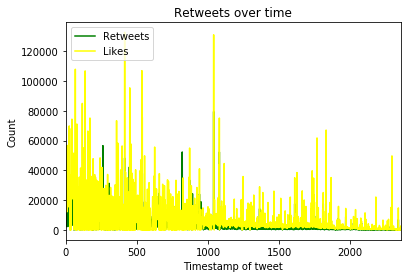

In [55]:
import matplotlib.pyplot as plt
master_sheet['retweet_count'].plot(color = 'Green', label='Retweets')
master_sheet['favorite_count'].plot(color = 'Yellow', label='Likes')
plt.legend(loc='upper left')
plt.ylabel('Count')
plt.xlabel('Timestamp of tweet')
plt.title('Retweets over time')
plt.savefig('Division of the dog stages.png')
plt.show()

 In genera number of Likes are very higher than number of Retweets

**Which dog brees are most popular? (likes and retweets)**

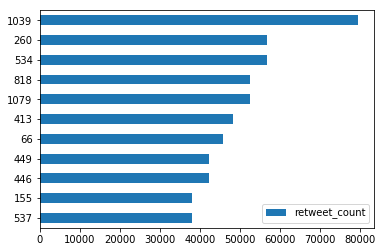

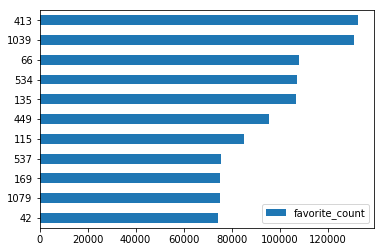

In [93]:
def plot_for(value):
    return master_sheet[[value]].sort_values(value, ascending=False)[10::-1].plot(kind= 'barh')

plot_for('retweet_count')
plot_for('favorite_count')

The dog brees that have most likes is not similar to the dog brees that have most retweets.  Ther are some dog brees appear in the two visuals: bedlington terrier. Dog brees that have highest number of retweets are samoyed and cocker spaniel. 
In gemeral, number of likes or favorites is much higher than the number of retweets.

**Whic is the most owned dog?**

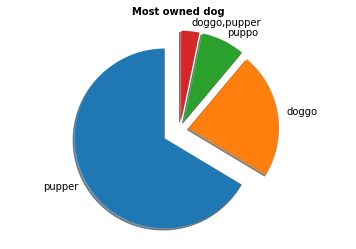

In [66]:
stage_count= list(master_sheet[master_sheet['stage']!= 'NaN']['stage'].value_counts())[0:4]
stage= master_sheet[master_sheet['stage']!= 'NaN']['stage'].value_counts().index.tolist()[0:4]
exp = (0.2, 0.1, 0.1, 0.1)

fig, ax1= plt.subplots()
ax1.pie(stage_count, explode= exp, labels= stage, shadow= True, startangle= 90)
plt.title('Most owned dog', weight='bold', fontsize=10)
ax1.axis('equal')
plt.savefig('Dogbrees.png')

In [90]:
master_sheet[master_sheet['stage'] != 'NaN'].groupby('stage')['rating_numerator'].mean()

stage
doggo            11.879518
doggo,floofer    11.000000
doggo,pupper     11.250000
doggo,puppo      13.000000
floofer          11.888889
pupper           10.853061
puppo            12.103448
Name: rating_numerator, dtype: float64

Pupper is the most owned dog and at the same time it have the lowest average raitings.